# HH4b WP Optimization Studies

## Importing packages and setting up containers

In [2]:
import os
import sys
from pathlib import Path
import subprocess
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from h5py import File
import itertools as it
import joblib
import time
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy.stats import norm
import random
from IPython.display import display, HTML, Image
import uproot as up
import mplhep as hep
# Use the ATLAS style in mplhep
plt.style.use(hep.style.ATLAS)

## Discriminant Variable (MLPL) Overlayed Histograms & Cut Suggestion

In [26]:
""" Loading the MLPL Distributions """
#folder_name = 'Distributions/MLPL_Distributions/mlpl_2_all/'
#folder_name = 'Distributions/MLPL_Distributions/mlpl_3_5'
folder_name = "Distributions/MLPL_Distributions/mlpl_3_all"
#folder_name = 'Distributions/MLPL_Distributions/mlpl_4_5'
#folder_name = 'Distributions/MLPL_Distributions/mlpl_4_6'
#folder_name = 'Distributions/MLPL_Distributions/mlpl_4_all'

EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = np.array(joblib.load('./' + folder_name + '/EB_dist_weights.sav'))
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
hh4b_dist_weights = joblib.load('./' + folder_name + '/hh4b_dist_weights.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

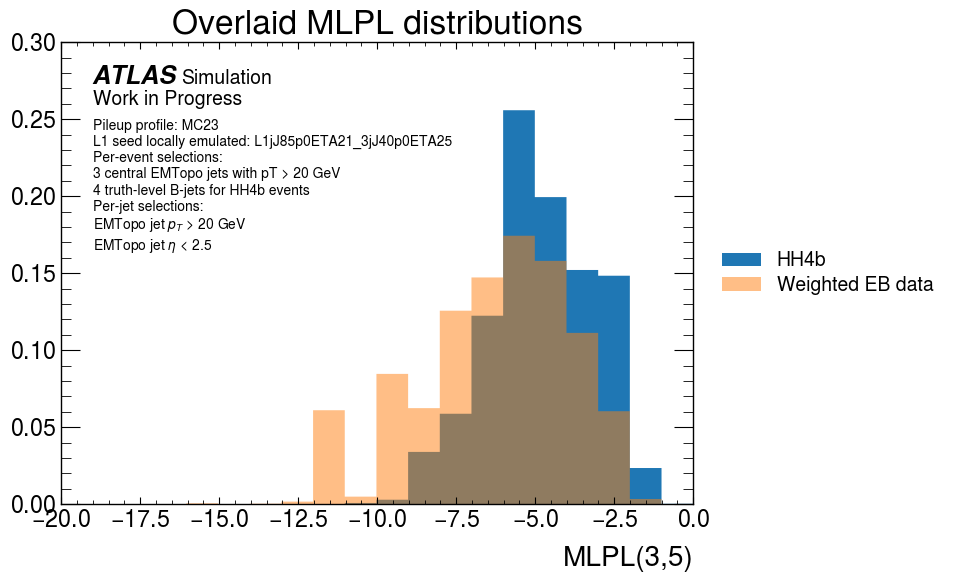

In [25]:
"""MLPL Overlayed Histograms"""
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=4, rlabel="Work in Progress")

minMLPL = min([min(EB_dist),min(hh4b_dist),min(jz0_dist),min(jz1_dist),min(jz2_dist),
                        min(jz3_dist),min(jz4_dist),min(jz5_dist)])
bins = np.linspace(minMLPL, 0, int(0-minMLPL))
plt.hist(hh4b_dist, bins, alpha=1, label='HH4b', histtype='stepfilled', density=True, weights=hh4b_dist_weights)
plt.hist(EB_dist, bins, alpha=0.5, label='Weighted EB data', histtype='stepfilled', density=True, weights = EB_dist_weights)
#plt.hist(jz0_dist, bins, alpha=1, label='JZ0', histtype='step')
#plt.hist(jz1_dist, bins, alpha=1, label='JZ1', histtype='step')
#plt.hist(jz2_dist, bins, alpha=1, label='JZ2', histtype='step')
#plt.hist(jz3_dist, bins, alpha=1, label='JZ3', histtype='step')
#plt.hist(jz4_dist, bins, alpha=1, label='JZ4', histtype='step')
#plt.hist(jz5_dist, bins, alpha=1, label='JZ5', histtype='step')

# Adding custom text
text_x = 0.05  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Pileup profile: MC23
L1 seed locally emulated: L1jJ85p0ETA21_3jJ40p0ETA25
Per-event selections:
3 central EMTopo jets with pT > 20 GeV
4 truth-level B-jets for HH4b events
Per-jet selections: 
EMTopo jet $p_T$ > 20 GeV 
EMTopo jet $\eta$ < 2.5
"""
plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([-20,0])
plt.title("Overlaid MLPL distributions")
plt.xlabel("MLPL(3,5)")
#plt.savefig(".png")
plt.show()

In [34]:
#print ("Ideally, we want to lose 0% (as small percentage as we can) of the signal and keep 0% (as small percentage as we can) of the backrground\n")
#print("---------------------------\n")
cuts = np.arange(-12.05,-6.05,0.1)
for i in cuts:
    print("For a " + str(i) + " MLPL(3,5) WP we: \n" 
          "keep " + str((np.array(hh4b_dist) > i).sum() / len(hh4b_dist) * 100) + "% of the hh->4b signal efficiency\n"
          "reject " + str((np.array(EB_dist) < i).sum() / len(EB_dist) * 100) + "% of the EB_data sample\n"
          #"reject " + str((np.array(jz0_dist) < i).sum() / len(jz0_dist) * 100) + "% of the dijet (jz0) background\n"
          #"reject " + str((np.array(jz1_dist) < i).sum() / len(jz1_dist) * 100) + "% of the dijet (jz1) background\n"
          #"reject " + str((np.array(jz2_dist) < i).sum() / len(jz2_dist) * 100) + "% of the dijet (jz2) background\n"
          #"reject " + str((np.array(jz3_dist) < i).sum() / len(jz3_dist) * 100) + "% of the dijet (jz3) background\n"
          #"reject " + str((np.array(jz4_dist) < i).sum() / len(jz4_dist) * 100) + "% of the dijet (jz4) background\n"
          #"reject " + str((np.array(jz5_dist) < i).sum() / len(jz5_dist) * 100) + "% of the dijet (jz5) background\n"
          "______________________________________________________________________________________________________\n"
         )

For a -12.05 MLPL(3,5) WP we: 
keep 99.98172959805116% of the hh->4b signal efficiency
reject 1.8726591760299627% of the EB_data sample
______________________________________________________________________________________________________

For a -11.950000000000001 MLPL(3,5) WP we: 
keep 99.98172959805116% of the hh->4b signal efficiency
reject 1.8726591760299627% of the EB_data sample
______________________________________________________________________________________________________

For a -11.850000000000001 MLPL(3,5) WP we: 
keep 99.98172959805116% of the hh->4b signal efficiency
reject 1.9975031210986267% of the EB_data sample
______________________________________________________________________________________________________

For a -11.750000000000002 MLPL(3,5) WP we: 
keep 99.98172959805116% of the hh->4b signal efficiency
reject 1.9975031210986267% of the EB_data sample
______________________________________________________________________________________________________

F

## Jet Multiplicities Histograms

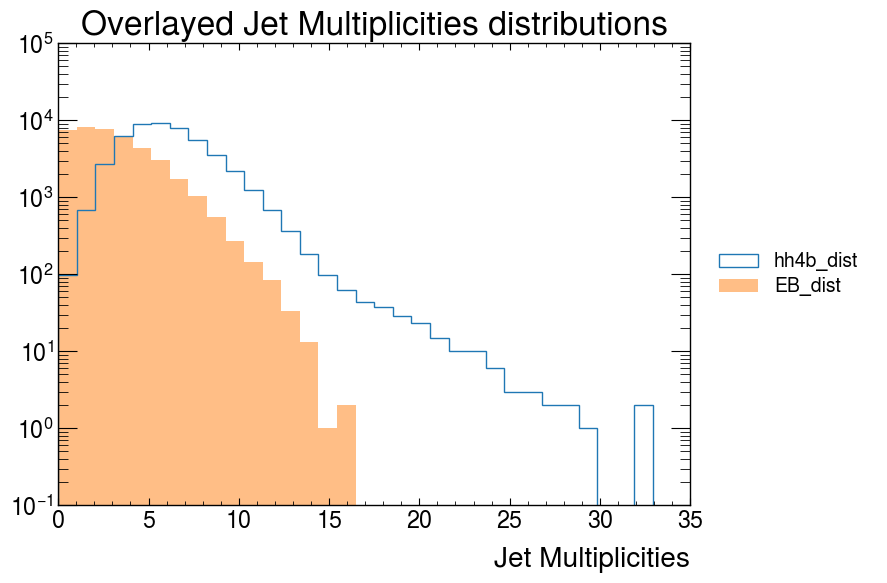

In [35]:
"""Jet Multiplicities Overlayed Histograms"""
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
hep.atlas.label(ax=plt.gca(), llabel="Simulation", loc=4, rlabel="Work in Progress")


bins = np.linspace(0, 35, 35)
EB_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/EBdata_multiplicities.sav')
hh4b_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/hh4b_multiplicities.sav')
jz0_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/jz0_multiplicities.sav')
jz1_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/jz1_multiplicities.sav')
jz2_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/jz2_multiplicities.sav')
jz3_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/jz3_multiplicities.sav')
jz4_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/jz4_multiplicities.sav')
jz5_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/jz5_multiplicities.sav')

plt.hist(hh4b_multiplicities, bins, alpha=1, label='hh4b_dist', histtype='step')
plt.hist(EB_multiplicities, bins, alpha=0.5, label='EB_dist', histtype='stepfilled')
#plt.hist(jz0_multiplicities, bins, alpha=1, label='jz0_dist', histtype='step')
#plt.hist(jz1_multiplicities, bins, alpha=0.5, label='jz1_dist', histtype='step')
#plt.hist(jz2_multiplicities, bins, alpha=0.4, label='jz2_dist', histtype='step')
#plt.hist(jz3_multiplicities, bins, alpha=0.3, label='jz3_dist', histtype='step')
#plt.hist(jz4_multiplicities, bins, alpha=0.2, label='jz4_dist', histtype='step')
#plt.hist(jz5_multiplicities, bins, alpha=0.5, label='jz5_dist', histtype='step')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Overlayed Jet Multiplicities distributions")
plt.xlabel("Jet Multiplicities")
plt.yscale("log")
plt.show()

## ROC Curve Implementations 

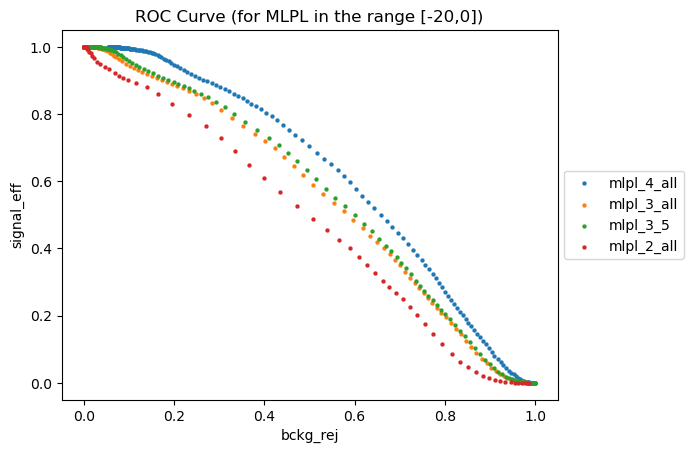

In [14]:
"""Implementation of the ROC Curve"""
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
hep.atlas.label(ax=plt.gca(), llabel="Simulation", loc=4, rlabel="Work in Progress")


cut_array = np.linspace(-20, 0, num=201)
slice_no = 5

sig_mlpl_4_all = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_4_all/' + '/hh4b_dist_nofake.sav')
bckg_mlpl_4_all = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_4_all' + '/jz' + str(slice_no) +'_dist.sav')
sig_mlpl_3_all = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_3_all' + '/hh4b_dist_nofake.sav')
bckg_mlpl_3_all = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_3_all' + '/jz' + str(slice_no) +'_dist.sav')
sig_mlpl_3_5 = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_3_5' + '/hh4b_dist_nofake.sav')
bckg_mlpl_3_5 = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_3_5' + '/jz' + str(slice_no) +'_dist.sav')
sig_mlpl_2_all = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_2_all' + '/hh4b_dist_nofake.sav')
bckg_mlpl_2_all = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_2_all' + '/jz' + str(slice_no) +'_dist.sav')

eff_mlpl_4_all = []
rej_mlpl_4_all = []
eff_mlpl_3_all = []
rej_mlpl_3_all = []
eff_mlpl_3_5 = []
rej_mlpl_3_5 = []
eff_mlpl_2_all = []
rej_mlpl_2_all = []

random_y = []
random_x = []
c = 0

for i in cut_array:
    c += 1/201
    random_y.append(c)
    random_x.append(c)
    eff_mlpl_4_all.append((np.array(sig_mlpl_4_all) > i).sum() / len(sig_mlpl_4_all))
    rej_mlpl_4_all.append((np.array(bckg_mlpl_4_all) < i).sum() / len(bckg_mlpl_4_all))
    eff_mlpl_3_all.append((np.array(sig_mlpl_3_all) > i).sum() / len(sig_mlpl_3_all))
    rej_mlpl_3_all.append((np.array(bckg_mlpl_3_all) < i).sum() / len(bckg_mlpl_3_all))
    eff_mlpl_3_5.append((np.array(sig_mlpl_3_5) > i).sum() / len(sig_mlpl_3_5))
    rej_mlpl_3_5.append((np.array(bckg_mlpl_3_5) < i).sum() / len(bckg_mlpl_3_5))
    eff_mlpl_2_all.append((np.array(sig_mlpl_2_all) > i).sum() / len(sig_mlpl_2_all))
    rej_mlpl_2_all.append((np.array(bckg_mlpl_2_all) < i).sum() / len(bckg_mlpl_2_all))

plt.scatter(rej_mlpl_4_all,eff_mlpl_4_all, alpha = 1, linewidths=0.1, marker = '.', label = 'mlpl_4_all')
plt.scatter(rej_mlpl_3_all,eff_mlpl_3_all, alpha = 1, linewidths=0.1, marker = '.', label = 'mlpl_3_all')
plt.scatter(rej_mlpl_3_5,eff_mlpl_3_5, alpha = 1, linewidths=0.1, marker = '.', label = 'mlpl_3_5')
plt.scatter(rej_mlpl_2_all,eff_mlpl_2_all, alpha = 1, linewidths=0.1, marker = '.', label = 'mlpl_2_all')
#plt.scatter(random_y,random_x, alpha = 0.5, linewidths=0.5, marker = '+', label = 'Random')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
#plt.xlim([0.4,1.05])
#plt.ylim([0.6,1.05])
plt.xlabel("bckg_rej")
plt.ylabel("signal_eff")
plt.show()

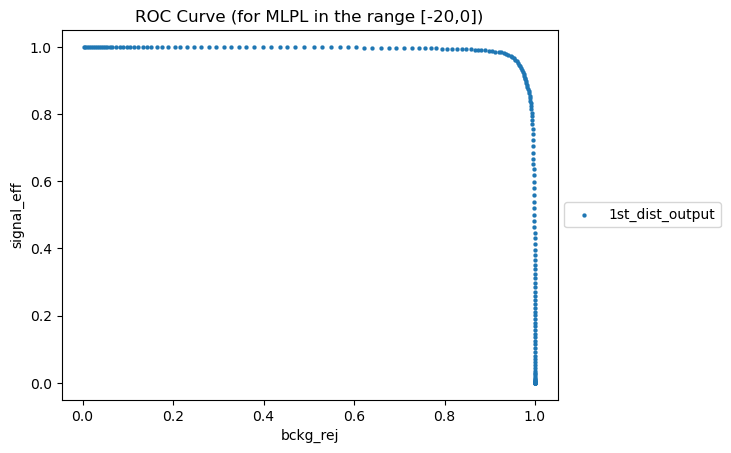

In [15]:
""" A parallel implementation of the ROC Curve """ 
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
hep.atlas.label(ax=plt.gca(), llabel="Simulation", loc=4, rlabel="Work in Progress")


cut_array = np.linspace(-20, 0, num=201)

signal = np.histogram(hh4b_dist, cut_array)[0]
background = np.histogram(jz0_dist, cut_array)[0]

sigeff = ( signal.sum() - signal[:].cumsum() ) / signal.sum()
bckgrej = background[:].cumsum() / background.sum()

plt.scatter(bckgrej,sigeff, alpha = 1, linewidths=0.1, marker = '.', label = '1st_dist_output')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
#plt.xlim([0.4,1.05])
#plt.ylim([0.6,1.05])
plt.xlabel("bckg_rej")
plt.ylabel("signal_eff")
plt.show()

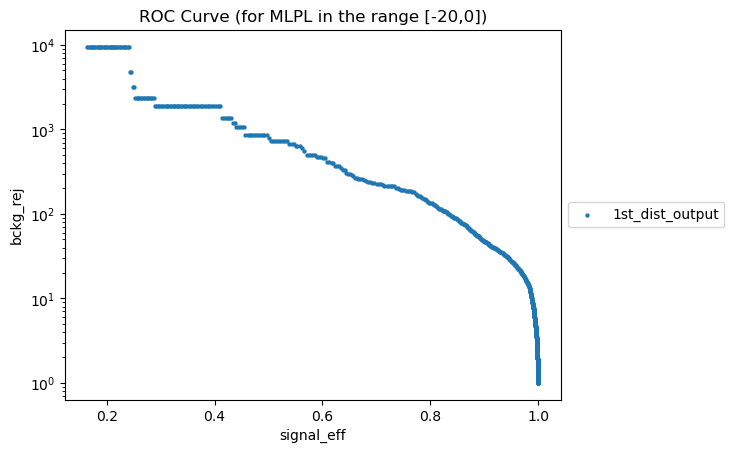

In [16]:
""" A standard implementation of the ROC Curve """ 
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
hep.atlas.label(ax=plt.gca(), llabel="Simulation", loc=4, rlabel="Work in Progress")


cut_array = np.linspace(-20, 0, num=1001)

signal = np.histogram(hh4b_dist, cut_array)[0]
background = np.histogram(jz0_dist, cut_array)[0]

sigeff = ( signal.sum() - signal[:].cumsum() ) / signal.sum()
#bckgrej = background[:].cumsum() / background.sum()
bckgeff = ( background.sum() - background[:].cumsum() ) / background.sum()
valid = (bckgeff > 0) & (sigeff > 0)
rej = 1/bckgeff[valid]
eff = sigeff[valid]


plt.scatter(eff,rej, alpha = 1, linewidths=0.1, marker = '.', label = '1st_dist_output')
#plt.scatter(random_y,random_x, alpha = 0.5, linewidths=0.5, marker = '+', label = 'Random')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
#plt.xlim([0.4,1.05])
#plt.ylim([0.6,1.05])
plt.xlabel("signal_eff")
plt.ylabel("bckg_rej")
plt.show()

## Studies with JZ slices as background

### Implementing the weighted sum of the JZ slices

In [18]:
""" Getting the weights"""
bin_no = 100
minimum = -20
maximum = 0 

# Choosing any algorithm
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_all'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

EB_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/EBdata_multiplicities.sav')
hh4b_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/hh4b_multiplicities.sav')
jz0_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/jz0_multiplicities.sav')
jz1_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/jz1_multiplicities.sav')
jz2_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/jz2_multiplicities.sav')
jz3_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/jz3_multiplicities.sav')
jz4_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/jz4_multiplicities.sav')
jz5_multiplicities = joblib.load('Distributions/Jet_Multiplicity_Distributions' + '/jz5_multiplicities.sav')

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

### mlpl_4_all

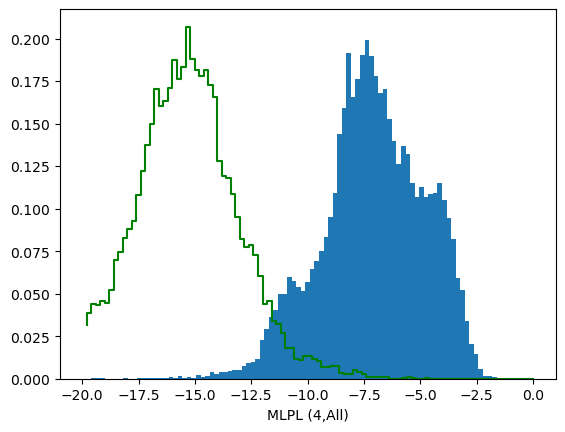

In [19]:
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_all'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

""" Doing the weighted sum of the JZ slices"""
bin_no = 100
minimum = -20
maximum = 0 

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

stacked_jz_slices = jz0_dist + jz1_dist + jz2_dist + jz3_dist + jz4_dist + jz5_dist
stacked_jz_weights = weights_jz0 + weights_jz1 + weights_jz2 + weights_jz3 + weights_jz4 + weights_jz5  

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
stacked_jz_weighted_sum_hist, stacked_jz_weighted_sum_edges = np.histogram(stacked_jz_slices, weights=stacked_jz_weights, bins = bin_no, range = (minimum, maximum), density = True)

"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
#plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True)
plt.step(stacked_jz_weighted_sum_edges[1:],stacked_jz_weighted_sum_hist, alpha=1, label='JZ_weighted_sum', color="green")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Overlayed MLPL distributions for the MLPL(4,All) algorithm")
plt.xlabel("MLPL (4,All)")
#plt.savefig("24.png")
plt.show()

### mlpl_4_5

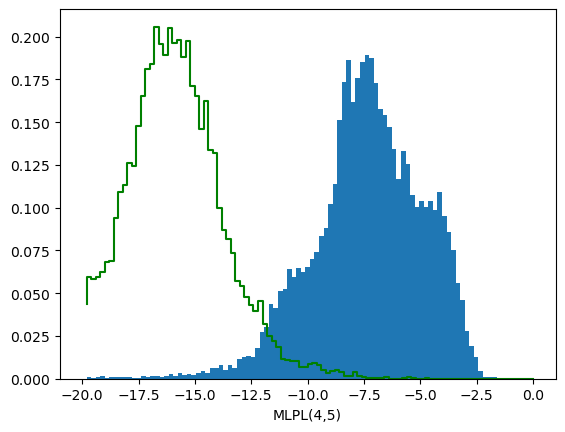

In [20]:
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_5'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

""" Doing the weighted sum of the JZ slices"""
bin_no = 100
minimum = -20
maximum = 0 

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

stacked_jz_slices = jz0_dist + jz1_dist + jz2_dist + jz3_dist + jz4_dist + jz5_dist
stacked_jz_weights = weights_jz0 + weights_jz1 + weights_jz2 + weights_jz3 + weights_jz4 + weights_jz5  

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
stacked_jz_weighted_sum_hist, stacked_jz_weighted_sum_edges = np.histogram(stacked_jz_slices, weights=stacked_jz_weights, bins = bin_no, range = (minimum, maximum), density = True)

"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
#plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True, weights = EB_dist_weights)
plt.step(stacked_jz_weighted_sum_edges[1:],stacked_jz_weighted_sum_hist, alpha=1, label='JZ_weighted_sum', color="green")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Overlayed MLPL distributions for the MLPL(4,5) algorithm")
plt.xlabel("MLPL(4,5)")
#plt.savefig("25.png")
plt.show()

### mlpl_4_6

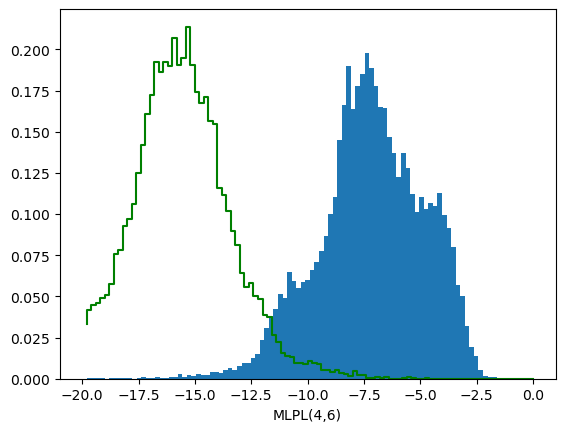

In [21]:
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_6'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

""" Doing the weighted sum of the JZ slices"""
bin_no = 100
minimum = -20
maximum = 0 

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

stacked_jz_slices = jz0_dist + jz1_dist + jz2_dist + jz3_dist + jz4_dist + jz5_dist
stacked_jz_weights = weights_jz0 + weights_jz1 + weights_jz2 + weights_jz3 + weights_jz4 + weights_jz5  

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
stacked_jz_weighted_sum_hist, stacked_jz_weighted_sum_edges = np.histogram(stacked_jz_slices, weights=stacked_jz_weights, bins = bin_no, range = (minimum, maximum), density = True)

"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
#plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True)
plt.step(stacked_jz_weighted_sum_edges[1:],stacked_jz_weighted_sum_hist, alpha=1, label='JZ_weighted_sum', color="green")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Overlayed MLPL distributions for the MLPL(4,6) algorithm")
plt.xlabel("MLPL(4,6)")
#plt.savefig("26.png")
plt.show()

### mlpl_3_all

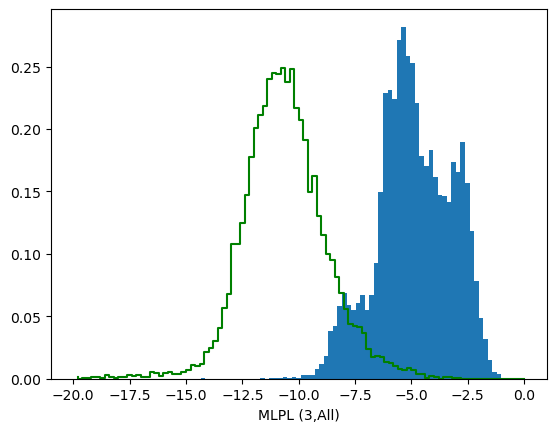

In [22]:
folder_name = 'Distributions/MLPL_Distributions/mlpl_3_all'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

""" Doing the weighted sum of the JZ slices"""
bin_no = 100
minimum = -20
maximum = 0 

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

stacked_jz_slices = jz0_dist + jz1_dist + jz2_dist + jz3_dist + jz4_dist + jz5_dist
stacked_jz_weights = weights_jz0 + weights_jz1 + weights_jz2 + weights_jz3 + weights_jz4 + weights_jz5  

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
stacked_jz_weighted_sum_hist, stacked_jz_weighted_sum_edges = np.histogram(stacked_jz_slices, weights=stacked_jz_weights, bins = bin_no, range = (minimum, maximum), density = True)

"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
#plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True)
plt.step(stacked_jz_weighted_sum_edges[1:],stacked_jz_weighted_sum_hist, alpha=1, label='JZ_weighted_sum', color="green")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Overlayed MLPL distributions for the MLPL(3,All) algorithm")
plt.xlabel("MLPL (3,All)")
#plt.savefig("27.png")
plt.show()

### mlpl_3_5

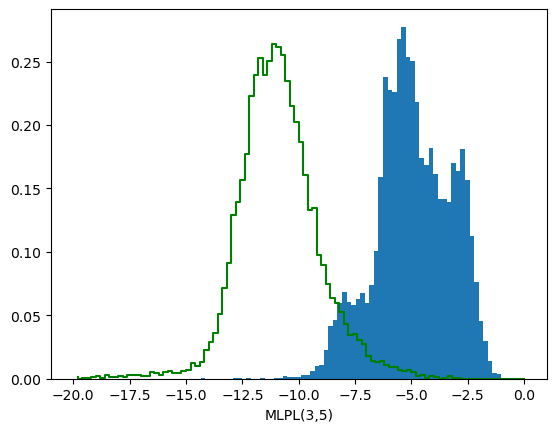

In [23]:
folder_name = 'Distributions/MLPL_Distributions/mlpl_3_5'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

""" Doing the weighted sum of the JZ slices"""
bin_no = 100
minimum = -20
maximum = 0 

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

stacked_jz_slices = jz0_dist + jz1_dist + jz2_dist + jz3_dist + jz4_dist + jz5_dist
stacked_jz_weights = weights_jz0 + weights_jz1 + weights_jz2 + weights_jz3 + weights_jz4 + weights_jz5  

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
stacked_jz_weighted_sum_hist, stacked_jz_weighted_sum_edges = np.histogram(stacked_jz_slices, weights=stacked_jz_weights, bins = bin_no, range = (minimum, maximum), density = True)

"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
#plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True)
plt.step(stacked_jz_weighted_sum_edges[1:],stacked_jz_weighted_sum_hist, alpha=1, label='JZ_weighted_sum', color="green")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Overlayed MLPL distributions for the MLPL(3,5) algorithm")
plt.xlabel("MLPL(3,5)")
#plt.savefig("28.png")
plt.show()

### mlpl_2_all

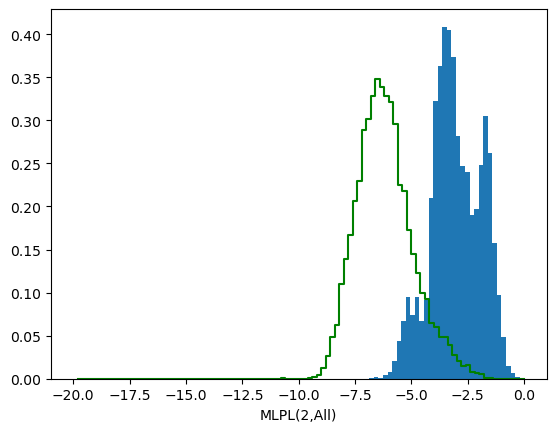

In [24]:
folder_name = 'Distributions/MLPL_Distributions/mlpl_2_all'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

""" Doing the weighted sum of the JZ slices"""
bin_no = 100
minimum = -20
maximum = 0 

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

stacked_jz_slices = jz0_dist + jz1_dist + jz2_dist + jz3_dist + jz4_dist + jz5_dist
stacked_jz_weights = weights_jz0 + weights_jz1 + weights_jz2 + weights_jz3 + weights_jz4 + weights_jz5  

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
stacked_jz_weighted_sum_hist, stacked_jz_weighted_sum_edges = np.histogram(stacked_jz_slices, weights=stacked_jz_weights, bins = bin_no, range = (minimum, maximum), density = True)

"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
#plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True)
plt.step(stacked_jz_weighted_sum_edges[1:],stacked_jz_weighted_sum_hist, alpha=1, label='JZ_weighted_sum', color="green")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Overlayed MLPL distributions for the MLPL(2,All) algorithm")
plt.xlabel("MLPL(2,All)")
#plt.savefig("29.png")
plt.show()

### Comparing ROC Curves for different algorithms with background being the weighted sum of the JZ slices

#### Setting up the plots

In [25]:
bin_no = 100
minimum = -20
maximum = 0 

#Cut array
cut_array = np.linspace(-20, 0, num=101)

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

In [26]:
""" Doing the weighted sum of the JZ slices for (mlpl_4_all) Algorithm"""
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_all'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist_mlpl_4_all = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist

signal_mlpl_4_all = np.histogram(hh4b_dist, cut_array)[0]
background_mlpl_4_all = jz_weighted_sum_hist_mlpl_4_all
sigeff_mlpl_4_all = ( signal_mlpl_4_all.sum() - signal_mlpl_4_all[:].cumsum() ) / signal_mlpl_4_all.sum()
bckgrej_mlpl_4_all = background_mlpl_4_all[:].cumsum() / background_mlpl_4_all.sum()

bckgeff_mlpl_4_all = ( background_mlpl_4_all.sum() - background_mlpl_4_all[:].cumsum() ) / background_mlpl_4_all.sum()
valid = (bckgeff_mlpl_4_all > 0) & (sigeff_mlpl_4_all > 0)
rej_mlpl_4_all = 1/bckgeff_mlpl_4_all[valid]
eff_mlpl_4_all = sigeff_mlpl_4_all[valid]

In [27]:
""" Doing the weighted sum of the JZ slices for (mlpl_4_5) Algorithm"""
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_5'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist_mlpl_4_5 = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist

signal_mlpl_4_5 = np.histogram(hh4b_dist, cut_array)[0]
background_mlpl_4_5 = jz_weighted_sum_hist_mlpl_4_5
sigeff_mlpl_4_5 = ( signal_mlpl_4_5.sum() - signal_mlpl_4_5[:].cumsum() ) / signal_mlpl_4_5.sum()
bckgrej_mlpl_4_5 = background_mlpl_4_5[:].cumsum() / background_mlpl_4_5.sum()

bckgeff_mlpl_4_5 = ( background_mlpl_4_5.sum() - background_mlpl_4_5[:].cumsum() ) / background_mlpl_4_5.sum()
valid = (bckgeff_mlpl_4_5 > 0) & (sigeff_mlpl_4_5 > 0)
rej_mlpl_4_5 = 1/bckgeff_mlpl_4_5[valid]
eff_mlpl_4_5 = sigeff_mlpl_4_5[valid]

In [28]:
""" Doing the weighted sum of the JZ slices for (mlpl_4_6) Algorithm"""
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_6'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist_mlpl_4_6 = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist

signal_mlpl_4_6 = np.histogram(hh4b_dist, cut_array)[0]
background_mlpl_4_6 = jz_weighted_sum_hist_mlpl_4_6
sigeff_mlpl_4_6 = ( signal_mlpl_4_6.sum() - signal_mlpl_4_6[:].cumsum() ) / signal_mlpl_4_6.sum()
bckgrej_mlpl_4_6 = background_mlpl_4_6[:].cumsum() / background_mlpl_4_6.sum()

bckgeff_mlpl_4_6 = ( background_mlpl_4_6.sum() - background_mlpl_4_6[:].cumsum() ) / background_mlpl_4_6.sum()
valid = (bckgeff_mlpl_4_6 > 0) & (sigeff_mlpl_4_6 > 0)
rej_mlpl_4_6 = 1/bckgeff_mlpl_4_6[valid]
eff_mlpl_4_6 = sigeff_mlpl_4_6[valid]

In [29]:
""" Doing the weighted sum of the JZ slices for (mlpl_3_all) Algorithm"""
folder_name = 'Distributions/MLPL_Distributions/mlpl_3_all'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist_mlpl_3_all = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
signal_mlpl_3_all = np.histogram(hh4b_dist, cut_array)[0]
background_mlpl_3_all = jz_weighted_sum_hist_mlpl_3_all
sigeff_mlpl_3_all = ( signal_mlpl_3_all.sum() - signal_mlpl_3_all[:].cumsum() ) / signal_mlpl_3_all.sum()
bckgrej_mlpl_3_all = background_mlpl_3_all[:].cumsum() / background_mlpl_3_all.sum()

bckgeff_mlpl_3_all = ( background_mlpl_3_all.sum() - background_mlpl_3_all[:].cumsum() ) / background_mlpl_3_all.sum()
valid = (bckgeff_mlpl_3_all > 0) & (sigeff_mlpl_3_all > 0)
rej_mlpl_3_all = 1/bckgeff_mlpl_3_all[valid]
eff_mlpl_3_all = sigeff_mlpl_3_all[valid]

In [30]:
""" Doing the weighted sum of the JZ slices for (mlpl_3_5) Algorithm"""
folder_name = 'Distributions/MLPL_Distributions/mlpl_3_5'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist_mlpl_3_5 = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
signal_mlpl_3_5 = np.histogram(hh4b_dist, cut_array)[0]
background_mlpl_3_5 = jz_weighted_sum_hist_mlpl_3_5
sigeff_mlpl_3_5 = ( signal_mlpl_3_5.sum() - signal_mlpl_3_5[:].cumsum() ) / signal_mlpl_3_5.sum()
bckgrej_mlpl_3_5 = background_mlpl_3_5[:].cumsum() / background_mlpl_3_5.sum()

bckgeff_mlpl_3_5 = ( background_mlpl_3_5.sum() - background_mlpl_3_5[:].cumsum() ) / background_mlpl_3_5.sum()
valid = (bckgeff_mlpl_3_5 > 0) & (sigeff_mlpl_3_5 > 0)
rej_mlpl_3_5 = 1/bckgeff_mlpl_3_5[valid]
eff_mlpl_3_5 = sigeff_mlpl_3_5[valid]

In [31]:
""" Doing the weighted sum of the JZ slices for (mlpl_2_all) Algorithm"""
folder_name = 'Distributions/MLPL_Distributions/mlpl_2_all'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist_mlpl_2_all = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
signal_mlpl_2_all = np.histogram(hh4b_dist, cut_array)[0]
background_mlpl_2_all = jz_weighted_sum_hist_mlpl_2_all
sigeff_mlpl_2_all = ( signal_mlpl_2_all.sum() - signal_mlpl_2_all[:].cumsum() ) / signal_mlpl_2_all.sum()
bckgrej_mlpl_2_all = background_mlpl_2_all[:].cumsum() / background_mlpl_2_all.sum()

bckgeff_mlpl_2_all = ( background_mlpl_2_all.sum() - background_mlpl_2_all[:].cumsum() ) / background_mlpl_2_all.sum()
valid = (bckgeff_mlpl_2_all > 0) & (sigeff_mlpl_2_all > 0)
rej_mlpl_2_all = 1/bckgeff_mlpl_2_all[valid]
eff_mlpl_2_all = sigeff_mlpl_2_all[valid]

#### Plotting

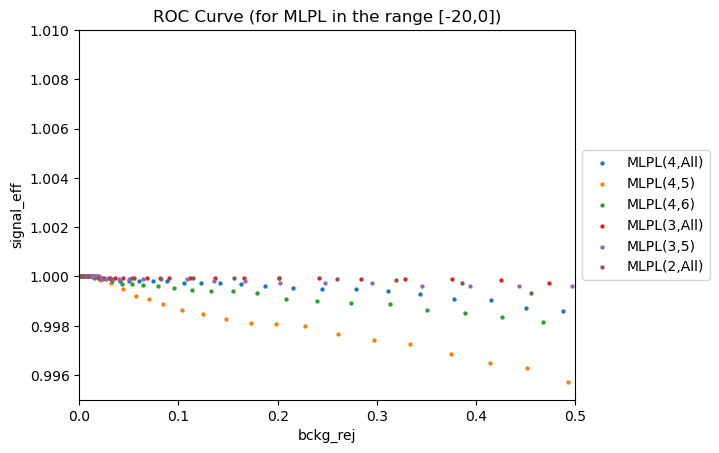

In [32]:
""" ROC Curve Implementation with the background being the weighted sum of the JZ slices """ 
cut_array = np.linspace(-20, 0, num=101)

plt.scatter(bckgrej_mlpl_4_all,sigeff_mlpl_4_all, alpha = 1, linewidths=0.1, marker = '.', label = 'MLPL(4,All)')
plt.scatter(bckgrej_mlpl_4_5,sigeff_mlpl_4_5, alpha = 1, linewidths=0.1, marker = '.', label = 'MLPL(4,5)')
plt.scatter(bckgrej_mlpl_4_6,sigeff_mlpl_4_6, alpha = 1, linewidths=0.1, marker = '.', label = 'MLPL(4,6)')
plt.scatter(bckgrej_mlpl_3_all,sigeff_mlpl_3_all, alpha = 1, linewidths=0.1, marker = '.', label = 'MLPL(3,All)')
plt.scatter(bckgrej_mlpl_3_5,sigeff_mlpl_3_5, alpha = 1, linewidths=0.1, marker = '.', label = 'MLPL(3,5)')
plt.scatter(bckgrej_mlpl_2_all,sigeff_mlpl_2_all, alpha = 1, linewidths=0.1, marker = '.', label = 'MLPL(2,All)')
#plt.scatter(random_y,random_x, alpha = 0.5, linewidths=0.5, marker = '+', label = 'Random')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
plt.xlim([0.0,0.5])
plt.ylim([0.995,1.01])
plt.xlabel("bckg_rej")
plt.ylabel("signal_eff")
plt.show()

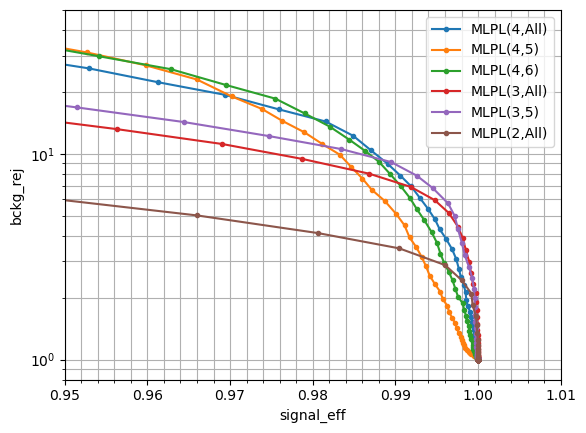

In [33]:
""" A standard implementation of the ROC Curve """ 
cut_array = np.linspace(-20, 0, num=101)

plt.plot(eff_mlpl_4_all, rej_mlpl_4_all, alpha = 1, marker = '.', label = 'MLPL(4,All)')
plt.plot(eff_mlpl_4_5, rej_mlpl_4_5, alpha = 1, marker = '.', label = 'MLPL(4,5)')
plt.plot(eff_mlpl_4_6, rej_mlpl_4_6, alpha = 1, marker = '.', label = 'MLPL(4,6)')
plt.plot(eff_mlpl_3_all, rej_mlpl_3_all, alpha = 1, marker = '.', label = 'MLPL(3,All)')
plt.plot(eff_mlpl_3_5, rej_mlpl_3_5, alpha = 1, marker = '.', label = 'MLPL(3,5)')
plt.plot(eff_mlpl_2_all, rej_mlpl_2_all, alpha = 1, marker = '.', label = 'MLPL(2,All)')
plt.yscale('log')
#plt.legend(loc='u left', bbox_to_anchor=(1, 0.5))
#plt.title("ROC Curve (for MLPL in the range [-20,0])")
plt.legend()
plt.xlim([0.95,1.01])
plt.ylim([0.8,50])
plt.xlabel("signal_eff")
plt.ylabel("bckg_rej")
plt.grid()
#plt.figure(figsize=(100,100))
plt.grid(which = "minor")
plt.minorticks_on()
#plt.savefig("30.png")
plt.show()

## Studies with the EB data as background

### mlpl_4_all

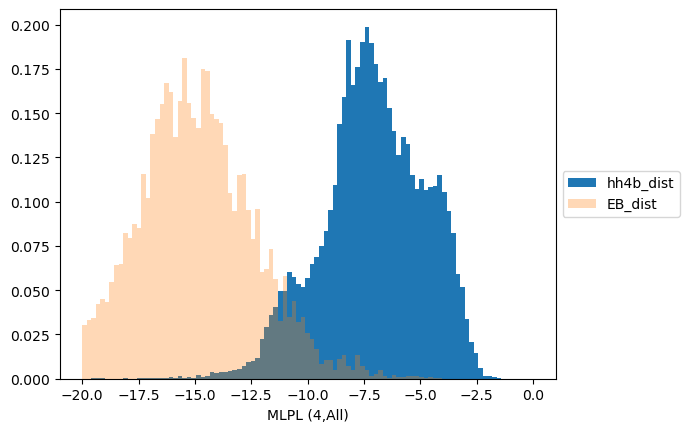

In [34]:
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_all'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')

bin_no = 100
minimum = -20
maximum = 0 


"""MLPL Overlayed Histograms"""
bins = np.linspace(minimum, maximum, bin_no)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True, weights = EB_dist_weights)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Overlayed MLPL distributions for the MLPL(4,All) algorithm")
plt.xlabel("MLPL (4,All)")
#plt.savefig("24.png")
plt.show()

### mlpl_4_5

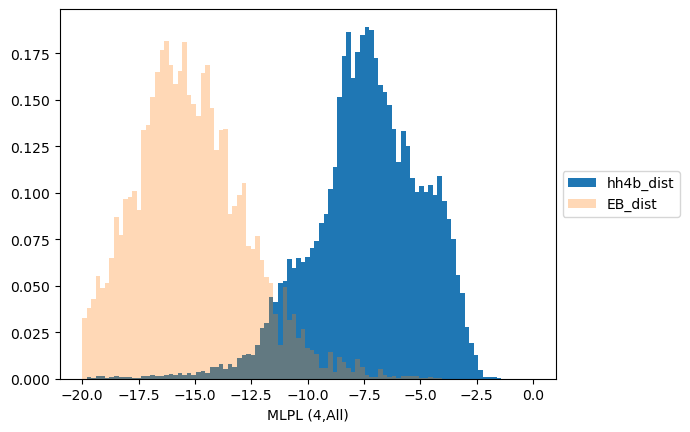

In [35]:
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_5'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')

bin_no = 100
minimum = -20
maximum = 0 


"""MLPL Overlayed Histograms"""
bins = np.linspace(minimum, maximum, bin_no)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True, weights = EB_dist_weights)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Overlayed MLPL distributions for the MLPL(4,All) algorithm")
plt.xlabel("MLPL (4,All)")
#plt.savefig("24.png")
plt.show()

### mlpl_4_6

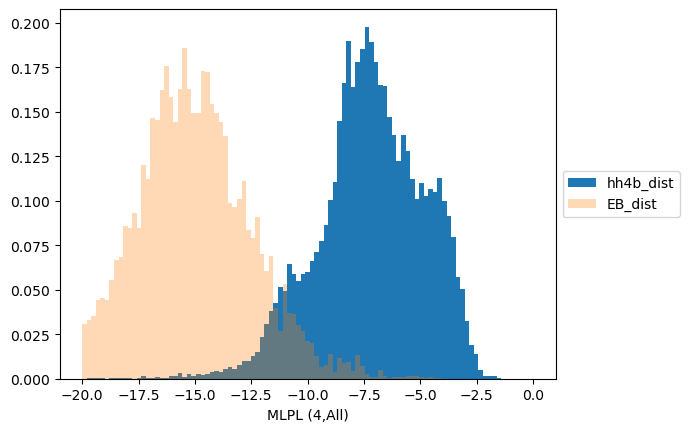

In [36]:
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_6'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')

bin_no = 100
minimum = -20
maximum = 0 


"""MLPL Overlayed Histograms"""
bins = np.linspace(minimum, maximum, bin_no)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True, weights = EB_dist_weights)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Overlayed MLPL distributions for the MLPL(4,All) algorithm")
plt.xlabel("MLPL (4,All)")
#plt.savefig("24.png")
plt.show()

### mlpl_3_all

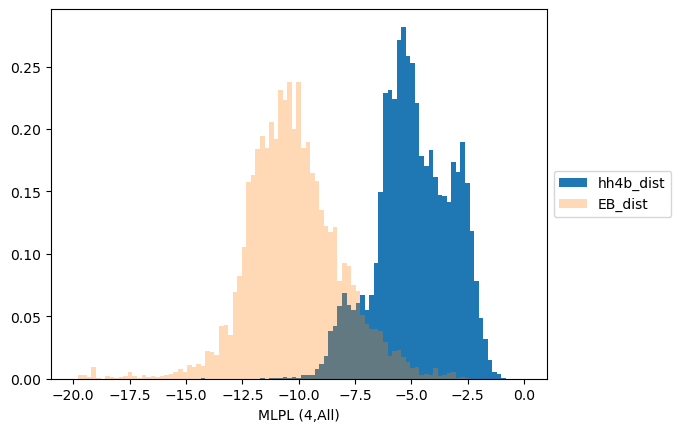

In [37]:
folder_name = 'Distributions/MLPL_Distributions/mlpl_3_all'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')

bin_no = 100
minimum = -20
maximum = 0 


"""MLPL Overlayed Histograms"""
bins = np.linspace(minimum, maximum, bin_no)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True, weights = EB_dist_weights)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Overlayed MLPL distributions for the MLPL(4,All) algorithm")
plt.xlabel("MLPL (4,All)")
#plt.savefig("24.png")
plt.show()

### mlpl_3_5

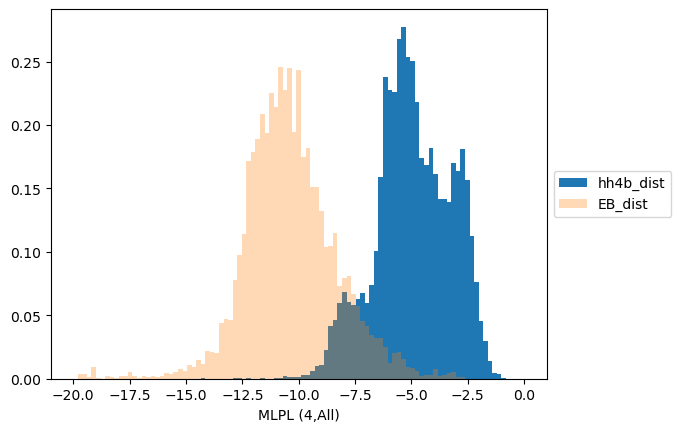

In [38]:
folder_name = 'Distributions/MLPL_Distributions/mlpl_3_5'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')

bin_no = 100
minimum = -20
maximum = 0 


"""MLPL Overlayed Histograms"""
bins = np.linspace(minimum, maximum, bin_no)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True, weights = EB_dist_weights)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Overlayed MLPL distributions for the MLPL(4,All) algorithm")
plt.xlabel("MLPL (4,All)")
#plt.savefig("24.png")
plt.show()

### mlpl_2_all

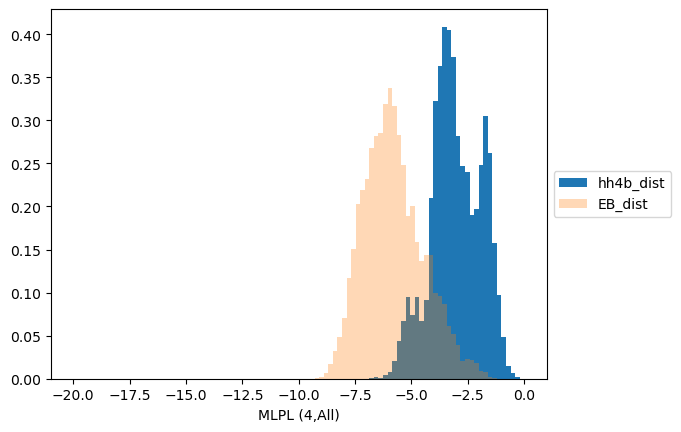

In [39]:
folder_name = 'Distributions/MLPL_Distributions/mlpl_2_all'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')

bin_no = 100
minimum = -20
maximum = 0 


"""MLPL Overlayed Histograms"""
bins = np.linspace(minimum, maximum, bin_no)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True, weights = EB_dist_weights)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Overlayed MLPL distributions for the MLPL(4,All) algorithm")
plt.xlabel("MLPL (4,All)")
#plt.savefig("24.png")
plt.show()

### Comparing ROC Curves for different algorithms with background being the weighted EB data

#### Setting up the plots

In [40]:
bin_no = 100
minimum = -20
maximum = 0 

#Cut array
cut_array = np.linspace(-20, 0, num=101)

In [41]:
""" Getting signal eff and bckg [weighted EB data] rej for (mlpl_4_all) Algorithm"""
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_all'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')

signal_mlpl_4_all = np.histogram(hh4b_dist, cut_array)[0]
background_mlpl_4_all, bckg_bin_edges = np.histogram(EB_dist, weights=EB_dist_weights, bins = bin_no, range = (minimum, maximum))
sigeff_mlpl_4_all = ( signal_mlpl_4_all.sum() - signal_mlpl_4_all[:].cumsum() ) / signal_mlpl_4_all.sum()
bckgrej_mlpl_4_all = background_mlpl_4_all[:].cumsum() / background_mlpl_4_all.sum()

bckgeff_mlpl_4_all = ( background_mlpl_4_all.sum() - background_mlpl_4_all[:].cumsum() ) / background_mlpl_4_all.sum()
valid = (bckgeff_mlpl_4_all > 0) & (sigeff_mlpl_4_all > 0)
rej_mlpl_4_all = 1/bckgeff_mlpl_4_all[valid]
eff_mlpl_4_all = sigeff_mlpl_4_all[valid]

In [42]:
""" Getting signal eff and bckg [weighted EB data] rej for (mlpl_4_5) Algorithm"""
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_5'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')

signal_mlpl_4_5 = np.histogram(hh4b_dist, cut_array)[0]
background_mlpl_4_5, bckg_bin_edges = np.histogram(EB_dist, weights=EB_dist_weights, bins = bin_no, range = (minimum, maximum))
sigeff_mlpl_4_5 = ( signal_mlpl_4_5.sum() - signal_mlpl_4_5[:].cumsum() ) / signal_mlpl_4_5.sum()
bckgrej_mlpl_4_5 = background_mlpl_4_5[:].cumsum() / background_mlpl_4_5.sum()

bckgeff_mlpl_4_5 = ( background_mlpl_4_5.sum() - background_mlpl_4_5[:].cumsum() ) / background_mlpl_4_5.sum()
valid = (bckgeff_mlpl_4_5 > 0) & (sigeff_mlpl_4_5 > 0)
rej_mlpl_4_5 = 1/bckgeff_mlpl_4_5[valid]
eff_mlpl_4_5 = sigeff_mlpl_4_5[valid]

In [43]:
""" Getting signal eff and bckg [weighted EB data] rej for (mlpl_4_6) Algorithm"""
folder_name = 'Distributions/MLPL_Distributions/mlpl_4_6'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')

signal_mlpl_4_6 = np.histogram(hh4b_dist, cut_array)[0]
background_mlpl_4_6, bckg_bin_edges = np.histogram(EB_dist, weights=EB_dist_weights, bins = bin_no, range = (minimum, maximum))
sigeff_mlpl_4_6 = ( signal_mlpl_4_6.sum() - signal_mlpl_4_6[:].cumsum() ) / signal_mlpl_4_6.sum()
bckgrej_mlpl_4_6 = background_mlpl_4_6[:].cumsum() / background_mlpl_4_6.sum()

bckgeff_mlpl_4_6 = ( background_mlpl_4_6.sum() - background_mlpl_4_6[:].cumsum() ) / background_mlpl_4_6.sum()
valid = (bckgeff_mlpl_4_6 > 0) & (sigeff_mlpl_4_6 > 0)
rej_mlpl_4_6 = 1/bckgeff_mlpl_4_6[valid]
eff_mlpl_4_6 = sigeff_mlpl_4_6[valid]

In [44]:
""" Getting signal eff and bckg [weighted EB data] rej for (mlpl_3_all) Algorithm"""
folder_name = 'Distributions/MLPL_Distributions/mlpl_3_all'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')

signal_300Allhighest_dist = np.histogram(hh4b_dist, cut_array)[0]
background_mlpl_3_all, bckg_bin_edges = np.histogram(EB_dist, weights=EB_dist_weights, bins = bin_no, range = (minimum, maximum))
sigeff_mlpl_3_all = ( signal_mlpl_3_all.sum() - signal_mlpl_3_all[:].cumsum() ) / signal_mlpl_3_all.sum()
bckgrej_mlpl_3_all = background_mlpl_3_all[:].cumsum() / background_mlpl_3_all.sum()

bckgeff_mlpl_3_all = ( background_mlpl_3_all.sum() - background_mlpl_3_all[:].cumsum() ) / background_mlpl_3_all.sum()
valid = (bckgeff_mlpl_3_all > 0) & (sigeff_mlpl_3_all > 0)
rej_mlpl_3_all = 1/bckgeff_mlpl_3_all[valid]
eff_mlpl_3_all = sigeff_mlpl_3_all[valid]

In [45]:
""" Getting signal eff and bckg [weighted EB data] rej for (mlpl_3_5) Algorithm"""
folder_name = 'Distributions/MLPL_Distributions/mlpl_3_5'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')

signal_mlpl_3_5 = np.histogram(hh4b_dist, cut_array)[0]
background_mlpl_3_5, bckg_bin_edges = np.histogram(EB_dist, weights=EB_dist_weights, bins = bin_no, range = (minimum, maximum))
sigeff_mlpl_3_5 = ( signal_mlpl_3_5.sum() - signal_mlpl_3_5[:].cumsum() ) / signal_mlpl_3_5.sum()
bckgrej_mlpl_3_5 = background_mlpl_3_5[:].cumsum() / background_mlpl_3_5.sum()

bckgeff_mlpl_3_5 = ( background_mlpl_3_5.sum() - background_mlpl_3_5[:].cumsum() ) / background_mlpl_3_5.sum()
valid = (bckgeff_mlpl_3_5 > 0) & (sigeff_mlpl_3_5 > 0)
rej_mlpl_3_5 = 1/bckgeff_mlpl_3_5[valid]
eff_mlpl_3_5 = sigeff_mlpl_3_5[valid]

In [46]:
""" Getting signal eff and bckg [weighted EB data] rej for (mlpl_2_all) Algorithm"""
folder_name = 'Distributions/MLPL_Distributions/mlpl_2_all'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
EB_dist_weights = joblib.load('./' + folder_name + '/EB_dist_weights.sav')

signal_mlpl_2_all = np.histogram(hh4b_dist, cut_array)[0]
background_mlpl_2_all, bckg_bin_edges = np.histogram(EB_dist, weights=EB_dist_weights, bins = bin_no, range = (minimum, maximum))
sigeff_mlpl_2_all = ( signal_mlpl_2_all.sum() - signal_mlpl_2_all[:].cumsum() ) / signal_mlpl_2_all.sum()
bckgrej_mlpl_2_all = background_mlpl_2_all[:].cumsum() / background_mlpl_2_all.sum()

bckgeff_mlpl_2_all = ( background_mlpl_2_all.sum() - background_mlpl_2_all[:].cumsum() ) / background_mlpl_2_all.sum()
valid = (bckgeff_mlpl_2_all > 0) & (sigeff_mlpl_2_all > 0)
rej_mlpl_2_all = 1/bckgeff_mlpl_2_all[valid]
eff_mlpl_2_all = sigeff_mlpl_2_all[valid]

#### Plotting

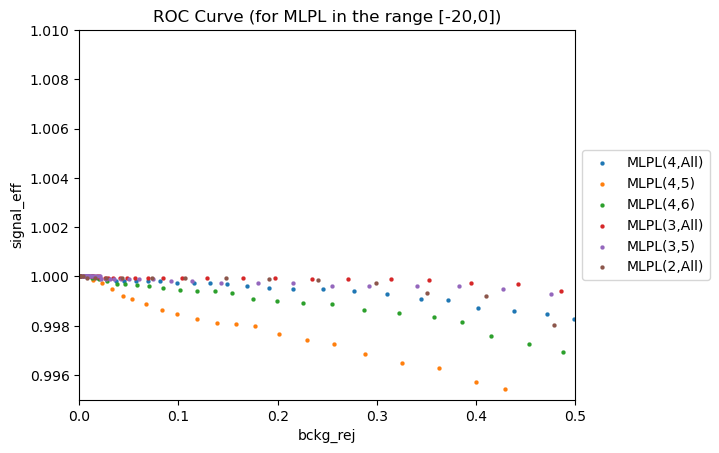

In [47]:
""" ROC Curve Implementation with the background being the weighted EB data """ 
cut_array = np.linspace(-20, 0, num=101)

plt.scatter(bckgrej_mlpl_4_all,sigeff_mlpl_4_all, alpha = 1, linewidths=0.1, marker = '.', label = 'MLPL(4,All)')
plt.scatter(bckgrej_mlpl_4_5,sigeff_mlpl_4_5, alpha = 1, linewidths=0.1, marker = '.', label = 'MLPL(4,5)')
plt.scatter(bckgrej_mlpl_4_6,sigeff_mlpl_4_6, alpha = 1, linewidths=0.1, marker = '.', label = 'MLPL(4,6)')
plt.scatter(bckgrej_mlpl_3_all,sigeff_mlpl_3_all, alpha = 1, linewidths=0.1, marker = '.', label = 'MLPL(3,All)')
plt.scatter(bckgrej_mlpl_3_5,sigeff_mlpl_3_5, alpha = 1, linewidths=0.1, marker = '.', label = 'MLPL(3,5)')
plt.scatter(bckgrej_mlpl_2_all,sigeff_mlpl_2_all, alpha = 1, linewidths=0.1, marker = '.', label = 'MLPL(2,All)')
#plt.scatter(random_y,random_x, alpha = 0.5, linewidths=0.5, marker = '+', label = 'Random')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
plt.xlim([0.0,0.5])
plt.ylim([0.995,1.01])
plt.xlabel("bckg_rej")
plt.ylabel("signal_eff")
plt.show()

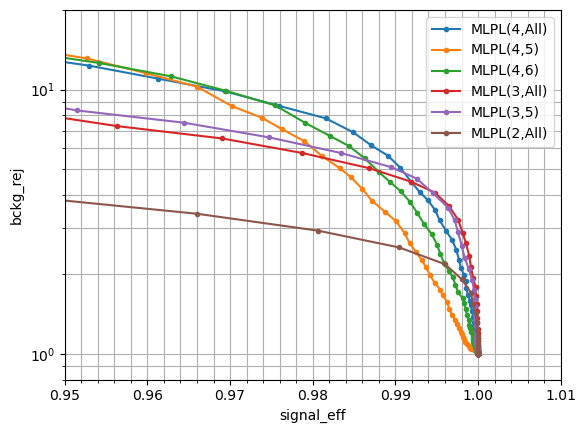

In [48]:
""" A standard implementation of the ROC Curve """ 
cut_array = np.linspace(-20, 0, num=101)

plt.plot(eff_mlpl_4_all, rej_mlpl_4_all, alpha = 1, marker = '.', label = 'MLPL(4,All)')
plt.plot(eff_mlpl_4_5, rej_mlpl_4_5, alpha = 1, marker = '.', label = 'MLPL(4,5)')
plt.plot(eff_mlpl_4_6, rej_mlpl_4_6, alpha = 1, marker = '.', label = 'MLPL(4,6)')
plt.plot(eff_mlpl_3_all, rej_mlpl_3_all, alpha = 1, marker = '.', label = 'MLPL(3,All)')
plt.plot(eff_mlpl_3_5, rej_mlpl_3_5, alpha = 1, marker = '.', label = 'MLPL(3,5)')
plt.plot(eff_mlpl_2_all, rej_mlpl_2_all, alpha = 1, marker = '.', label = 'MLPL(2,All)')
plt.yscale('log')
#plt.legend(loc='u left', bbox_to_anchor=(1, 0.5))
#plt.title("ROC Curve (for MLPL in the range [-20,0])")
plt.legend()
plt.xlim([0.95,1.01])
plt.ylim([0.8,20])
plt.xlabel("signal_eff")
plt.ylabel("bckg_rej")
plt.grid()
#plt.figure(figsize=(100,100))
plt.grid(which = "minor")
plt.minorticks_on()
#plt.savefig("30.png")
plt.show()

## Investigation of the number of bjets chosen in the hh->4b signal selection

In [49]:
""" for the mlpl_4_all"""
num_bjets_chosen_list = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_4_all' + '/num_bjets_chosen_list.sav')
num_bjets_chosen_array = np.array(num_bjets_chosen_list)
unique, counts = np.unique(num_bjets_chosen_array, return_counts=True)
print("The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: " + str(len(num_bjets_chosen_list)))
print("They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (mlpl_4_all) algorithm as follows: ")
print(np.asarray((unique, counts)).T)

The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: 19804
They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (mlpl_4_all) algorithm as follows: 
[[   0   35]
 [   1  207]
 [   2 2097]
 [   3 8630]
 [   4 8835]]


In [50]:
""" for the mlpl_4_5"""
num_bjets_chosen_list = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_4_5' + '/num_bjets_chosen_list.sav')
num_bjets_chosen_array = np.array(num_bjets_chosen_list)
unique, counts = np.unique(num_bjets_chosen_array, return_counts=True)
print("The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: " + str(len(num_bjets_chosen_list)))
print("They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (mlpl_4_5) algorithm as follows: ")
print(np.asarray((unique, counts)).T)

The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: 19804
They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (mlpl_4_5) algorithm as follows: 
[[   0    1]
 [   1  144]
 [   2 1851]
 [   3 8913]
 [   4 8895]]


In [51]:
""" for the mlpl_4_6"""
num_bjets_chosen_list = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_4_6' + '/num_bjets_chosen_list.sav')
num_bjets_chosen_array = np.array(num_bjets_chosen_list)
unique, counts = np.unique(num_bjets_chosen_array, return_counts=True)
print("The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: " + str(len(num_bjets_chosen_list)))
print("They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (mlpl_4_6) algorithm as follows: ")
print(np.asarray((unique, counts)).T)

The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: 19804
They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (mlpl_4_6) algorithm as follows: 
[[   0    8]
 [   1  153]
 [   2 2000]
 [   3 8715]
 [   4 8928]]


In [52]:
""" for the mlpl_3_all"""
num_bjets_chosen_list = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_3_all' + '/num_bjets_chosen_list.sav')
num_bjets_chosen_array = np.array(num_bjets_chosen_list)
unique, counts = np.unique(num_bjets_chosen_array, return_counts=True)
print("The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: " + str(len(num_bjets_chosen_list)))
print("They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (mlpl_3_all) algorithm as follows: ")
print(np.asarray((unique, counts)).T)

The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: 19804
They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (mlpl_3_all) algorithm as follows: 
[[    0    99]
 [    1   993]
 [    2  6496]
 [    3 12216]]


In [53]:
""" for the mlpl_3_5"""
num_bjets_chosen_list = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_3_5' + '/num_bjets_chosen_list.sav')
num_bjets_chosen_array = np.array(num_bjets_chosen_list)
unique, counts = np.unique(num_bjets_chosen_array, return_counts=True)
print("The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: " + str(len(num_bjets_chosen_list)))
print("They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (mlpl_3_5) algorithm as follows: ")
print(np.asarray((unique, counts)).T)

The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: 19804
They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (mlpl_3_5) algorithm as follows: 
[[    0    25]
 [    1   844]
 [    2  6295]
 [    3 12640]]


In [54]:
""" for the mlpl_2_all"""
num_bjets_chosen_list = joblib.load('./Distributions/MLPL_Distributions/' + 'mlpl_2_all' + '/num_bjets_chosen_list.sav')
num_bjets_chosen_array = np.array(num_bjets_chosen_list)
unique, counts = np.unique(num_bjets_chosen_array, return_counts=True)
print("The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: " + str(len(num_bjets_chosen_list)))
print("They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (mlpl_2_all) algorithm as follows: ")
print(np.asarray((unique, counts)).T)

The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: 19804
They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (mlpl_2_all) algorithm as follows: 
[[    0   520]
 [    1  4499]
 [    2 14785]]
